<a href="https://colab.research.google.com/github/ImanuelAndreasGulo/UAS-SEMESTER-4/blob/main/uasairevisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install streamlit scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 837.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


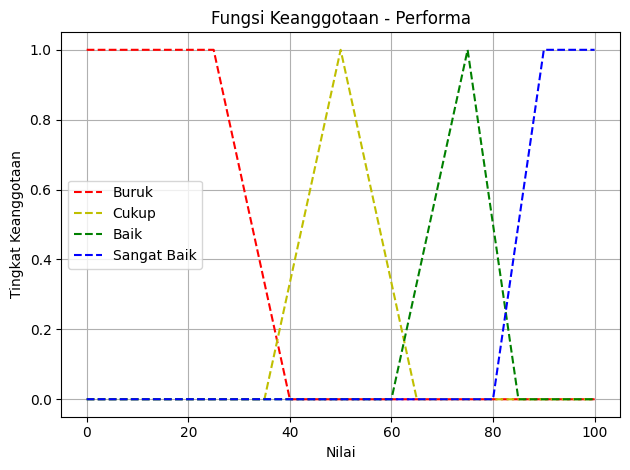

=== INPUT PENILAIAN KARYAWAN ===
Nama Karyawan (kosongkan untuk selesai): imanuel
  Kedisiplinan (0-10): 9
  Produktivitas (0-10): 9
  Kerjasama Tim (0-10): 10
  Kehadiran (0-10): 9
Nama Karyawan (kosongkan untuk selesai): andre
  Kedisiplinan (0-10): 10
  Produktivitas (0-10): 9
  Kerjasama Tim (0-10): 7
  Kehadiran (0-10): 5
Input tidak valid: 'performa'
Nama Karyawan (kosongkan untuk selesai): andre
  Kedisiplinan (0-10): 10
  Produktivitas (0-10): 4
  Kerjasama Tim (0-10): 5
  Kehadiran (0-10): 6
Nama Karyawan (kosongkan untuk selesai): 

=== HASIL PENILAIAN ===
  Nama   Kedisiplinan  Produktivitas  Kerjasama  Kehadiran  Nilai Fuzzy   Kategori 
imanuel       9.0          9.0          10.0       9.0        92.22     Sangat Baik
  andre      10.0          4.0           5.0       6.0        73.06            Baik

📊 Rata-rata nilai fuzzy performa: 82.64


KeyboardInterrupt: Interrupted by user

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definisikan variabel fuzzy
kdsp = ctrl.Antecedent(np.arange(0, 11, 1), 'kedisiplinan')
prdt = ctrl.Antecedent(np.arange(0, 11, 1), 'produktivitas')
krjs = ctrl.Antecedent(np.arange(0, 11, 1), 'kerjasama')
khdr = ctrl.Antecedent(np.arange(0, 11, 1), 'kehadiran')
perf = ctrl.Consequent(np.arange(0, 101, 1), 'performa')

# 2. Fungsi keanggotaan
for var in [kdsp, prdt, krjs, khdr]:
    var['rendah'] = fuzz.trapmf(var.universe, [0, 0, 2, 4])
    var['sedang'] = fuzz.trimf(var.universe, [3, 5, 7])
    var['tinggi'] = fuzz.trapmf(var.universe, [6, 8, 10, 10])

perf['buruk'] = fuzz.trapmf(perf.universe, [0, 0, 25, 40])
perf['cukup'] = fuzz.trimf(perf.universe, [35, 50, 65])
perf['baik'] = fuzz.trimf(perf.universe, [60, 75, 85])
perf['sangat_baik'] = fuzz.trapmf(perf.universe, [80, 90, 100, 100])

# ✳️ Tampilkan grafik fungsi keanggotaan performa (sekali di awal)
x_perf = perf.universe
plt.plot(x_perf, fuzz.trapmf(x_perf, [0, 0, 25, 40]), 'r--', label='Buruk')
plt.plot(x_perf, fuzz.trimf(x_perf, [35, 50, 65]), 'y--', label='Cukup')
plt.plot(x_perf, fuzz.trimf(x_perf, [60, 75, 85]), 'g--', label='Baik')
plt.plot(x_perf, fuzz.trapmf(x_perf, [80, 90, 100, 100]), 'b--', label='Sangat Baik')
plt.title("Fungsi Keanggotaan - Performa")
plt.xlabel("Nilai")
plt.ylabel("Tingkat Keanggotaan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Aturan fuzzy
rules = [
    ctrl.Rule(kdsp['tinggi'] & prdt['tinggi'] & krjs['tinggi'] & khdr['tinggi'], perf['sangat_baik']),
    ctrl.Rule(kdsp['rendah'] | prdt['rendah'] | krjs['rendah'] | khdr['rendah'], perf['buruk']),
    ctrl.Rule(kdsp['sedang'] & prdt['sedang'], perf['cukup']),
    ctrl.Rule(kdsp['tinggi'] & prdt['sedang'], perf['baik']),
    ctrl.Rule(kdsp['sedang'] & prdt['tinggi'], perf['baik']),
]

# 4. Bangun sistem fuzzy
system = ctrl.ControlSystem(rules)
simulator = ctrl.ControlSystemSimulation(system)

# 5. Proses multi-karyawan
data_karyawan = []

print("=== INPUT PENILAIAN KARYAWAN ===")
while True:
    nama = input("Nama Karyawan (kosongkan untuk selesai): ")
    if nama.strip() == "":
        break

    try:
        kd = float(input("  Kedisiplinan (0-10): "))
        pr = float(input("  Produktivitas (0-10): "))
        kr = float(input("  Kerjasama Tim (0-10): "))
        kh = float(input("  Kehadiran (0-10): "))

        simulator.input['kedisiplinan'] = kd
        simulator.input['produktivitas'] = pr
        simulator.input['kerjasama'] = kr
        simulator.input['kehadiran'] = kh
        simulator.compute()
        nilai = simulator.output['performa']

        if nilai >= 80:
            kategori = "Sangat Baik"
        elif nilai >= 65:
            kategori = "Baik"
        elif nilai >= 50:
            kategori = "Cukup"
        else:
            kategori = "Buruk"

        data_karyawan.append({
            "Nama": nama,
            "Kedisiplinan": kd,
            "Produktivitas": pr,
            "Kerjasama": kr,
            "Kehadiran": kh,
            "Nilai Fuzzy": round(nilai, 2),
            "Kategori": kategori
        })

    except Exception as e:
        print(f"Input tidak valid: {e}")

# 6. Tampilkan hasil
print("\n=== HASIL PENILAIAN ===")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')

df = pd.DataFrame(data_karyawan)
print(df.to_string(index=False))


# 7. Hitung dan tampilkan rata-rata
if len(data_karyawan) > 0:
    rata_rata = df["Nilai Fuzzy"].mean()
    print(f"\n📊 Rata-rata nilai fuzzy performa: {round(rata_rata, 2)}")

# 8. Simpan ke file CSV (opsional)
simpan = input("\nSimpan hasil ke file CSV? (y/n): ").lower()
if simpan == 'y':
    df.to_csv("hasil_penilaian_karyawan.csv", index=False)
    print("✔ Data berhasil disimpan ke 'hasil_penilaian_karyawan.csv'")
